# Análise bases Aleitamento Materno

**Foco: Aleitamento**

- Planejamento do mês

https://docs.google.com/document/d/1wAg3hIa5RJ4nVyRrIy3PdY7txyNWj1lr6zbANg_gBlM/edit

- Links das bases

https://enani.nutricao.ufrj.br/wp-content/uploads/2020/08/Relatorio-preliminar-AM-Site.pdf
https://rblh.fiocruz.br/sites/rblh.fiocruz.br/files/usuario/77/serie_doc_rblh_em_dados_corpo_anos_completo_compressed_3.pdf


## Análise exploratória

**Autores:**
- Luciano Domingues
- Rodrigo Castro

### Bibliotecas

In [ ]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Montar drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Diretórios

In [ ]:
path_arquivo = "/content/drive/Shareddrives/'PJE - Health Lake'/'[Time] Ciência'/'01 - Projetos'/'01 - Cronograma Ciência'/'07 - Análise de Agosto'/Notebooks/Datasets/"
path_arquivo

"/content/drive/Shareddrives/'PJE - Health Lake'/'[Time] Ciência'/'01 - Projetos'/'01 - Cronograma Ciência'/'07 - Análise de Agosto'/Notebooks/Datasets/"

In [ ]:
%ls $path_arquivo

'Brasil Consolidado mes 2017 a 2019a.csv'


In [ ]:
path_arquivo + "Brasil Consolidado mes 2017 a 2019a.csv"

"/content/drive/Shareddrives/'PJE - Health Lake'/'[Time] Ciência'/'01 - Projetos'/'01 - Cronograma Ciência'/'07 - Análise de Agosto'/Notebooks/Datasets/Brasil Consolidado mes 2017 a 2019a.csv"

In [ ]:
%cd $path_arquivo

/content/drive/Shareddrives/PJE - Health Lake/[Time] Ciência/01 - Projetos/01 - Cronograma Ciência/07 - Análise de Agosto/Notebooks/Datasets


### Dataset Bancos de Leite Humano - Consolidado Brasil de 2017 a 2019


#### Lendo o Dataset e trabalhando dados

 

In [ ]:
dados_blh = pd.read_csv("Brasil Consolidado mes 2017 a 2019a.csv", encoding='latin-1',sep=';')
dados_blh.head()

,Mes/Ano,Atend. Grupo,Atend. Individual,Visita Domiciliar,Doadoras,Receptores,Leite Humano Coletado,Leite Humano Distribuido,Leite Humano Transferido,Leite Humano recebido,Exame Microbiologico,Crematócrito,Acidez Dornic,Produção cadastradas no mês,Ano
0,jan,32832,154210,22034,15054,17520,"18793,5","12633,5","1945,6","1945,6",45084,46347,51334,343,2019
1,fev,30854,155890,21676,15067,17471,"16446,6","13035,1","1745,1","1745,1",46399,45882,50784,339,2019
2,mar,36276,163492,20721,15327,17827,"17580,8","13095,3","1927,3","1927,3",41433,44546,49232,340,2019
3,mai,40942,180301,24370,16536,18744,"20226,4","14917,9","2846,1","2846,1",46630,49124,54719,350,2019
4,abr,36415,169906,22859,15744,17851,"17825,8","14836,2","1893,9","1893,9",45912,49701,54617,348,2019


In [ ]:
dados_blh.dtypes

Mes/Ano                        object
Atend. Grupo                    int64
Atend. Individual               int64
Visita Domiciliar               int64
Doadoras                        int64
Receptores                      int64
Leite Humano Coletado          object
Leite Humano Distribuido       object
Leite Humano Transferido       object
Leite Humano recebido          object
Exame Microbiologico            int64
Crematócrito                    int64
Acidez Dornic                   int64
Produção cadastradas no mês     int64
Ano                             int64
dtype: object

In [ ]:
# dados_blh["Leite Humano Coletado"] = dados_blh["Leite Humano Coletado"].astype(float)

dados_blh['Leite Humano Coletado'] = pd.to_numeric(dados_blh['Leite Humano Coletado'].str.replace(',','.'))
dados_blh['Leite Humano recebido'] = pd.to_numeric(dados_blh['Leite Humano recebido'].str.replace(',','.'))

dados_blh.dtypes

Mes/Ano                         object
Atend. Grupo                     int64
Atend. Individual                int64
Visita Domiciliar                int64
Doadoras                         int64
Receptores                       int64
Leite Humano Coletado          float64
Leite Humano Distribuido        object
Leite Humano Transferido        object
Leite Humano recebido          float64
Exame Microbiologico             int64
Crematócrito                     int64
Acidez Dornic                    int64
Produção cadastradas no mês      int64
Ano                              int64
dtype: object

In [ ]:
# cons_2019 = dados_blh.query("Ano == 2019").values[:,1:15].sum(axis =0)
# cons_2018 = dados_blh.query("Ano == 2018").values[:,1:15].sum(axis =0)
# cons_2017 = dados_blh.query("Ano == 2017").values[:,1:15].sum(axis =0)

dados_ano = pd.DataFrame(data = {'Ano': ['2017','2018','2019'],
                          'Doadoras': [dados_blh.query("Ano == 2017").values[:,4].sum(axis =0),
                                       dados_blh.query("Ano == 2018").values[:,4].sum(axis =0),
                                       dados_blh.query("Ano == 2019").values[:,4].sum(axis =0)],
                          'Receptores': [dados_blh.query("Ano == 2017").values[:,5].sum(axis =0),
                                         dados_blh.query("Ano == 2018").values[:,5].sum(axis =0),
                                         dados_blh.query("Ano == 2019").values[:,5].sum(axis =0)],
                          'Leite Humano Coletado': [dados_blh.query("Ano == 2017").values[:,6].sum(axis =0),
                                                    dados_blh.query("Ano == 2018").values[:,6].sum(axis =0),
                                                    dados_blh.query("Ano == 2019").values[:,6].sum(axis =0)],
                          'Leite Humano recebido': [dados_blh.query("Ano == 2017").values[:,9].sum(axis =0),
                                                    dados_blh.query("Ano == 2018").values[:,9].sum(axis =0),
                                                    dados_blh.query("Ano == 2019").values[:,9].sum(axis =0)]})
dados_ano

,Ano,Doadoras,Receptores,Leite Humano Coletado,Leite Humano recebido
0,2017,186090,200939,216482.0,23720.3
1,2018,183299,186322,215849.6,25288.5
2,2019,188666,214515,222969.6,26294.8


### Dataframes - Processando dados preliminares ENANI-2019 - Análise da tendência do aleitamento materno no Brasil

####Prevalência de aleitamento materno exclusivo entre crianças menores de quatro meses

In [ ]:
aleit_materno_excl_menores_4meses = pd.DataFrame(data = {'Pesquisa': ['PNDS-1986','PNDS-1996','PNDS-2006','ENANI-2019'],
                          'Prevalência': [4.7, 29.2, 45.0,60.0]})
aleit_materno_excl_menores_4meses

,Pesquisa,Prevalência
0,PNDS-1986,4.7
1,PNDS-1996,29.2
2,PNDS-2006,45.0
3,ENANI-2019,60.0


####Prevalência de aleitamento materno exclusivo entre crianças menores de seis meses

In [ ]:
aleit_materno_excl_menores_6meses = pd.DataFrame(data = {'Pesquisa': ['PNDS-1986','PNDS-1996','PNDS-2006','ENANI-2019'],
                          'Prevalência': [2.9, 23.9, 37.1,45.7]})
aleit_materno_excl_menores_6meses

,Pesquisa,Prevalência
0,PNDS-1986,2.9
1,PNDS-1996,23.9
2,PNDS-2006,37.1
3,ENANI-2019,45.7


####Prevalência de aleitamento continuado aos 12 meses

In [ ]:
aleit_materno_continuado_12meses = pd.DataFrame(data = {'Pesquisa': ['PNDS-1986','PNDS-1996','PNDS-2006','ENANI-2019'],
                          'Prevalência': [30.0, 36.6, 48.5,53.1]})
aleit_materno_continuado_12meses

,Pesquisa,Prevalência
0,PNDS-1986,30.0
1,PNDS-1996,36.6
2,PNDS-2006,48.5
3,ENANI-2019,53.1


####Prevalência de aleitamento materno total entre crianças menores de 24 meses

In [ ]:
aleit_materno_total_menores_24meses = pd.DataFrame(data = {'Pesquisa': ['PNDS-1986','PNDS-1996','PNDS-2006','ENANI-2019'],
                          'Prevalência': [37.4, 44.8, 56.3,60.9]})
aleit_materno_total_menores_24meses

,Pesquisa,Prevalência
0,PNDS-1986,37.4
1,PNDS-1996,44.8
2,PNDS-2006,56.3
3,ENANI-2019,60.9


####Prevalência de aleitamento materno Idades juntas

In [ ]:
aleit_materno_idades_juntas = pd.DataFrame(data = {'Pesquisa': ['PNDS-1986','PNDS-1996','PNDS-2006','ENANI-2019',
                                                                'PNDS-1986','PNDS-1996','PNDS-2006','ENANI-2019',
                                                                'PNDS-1986','PNDS-1996','PNDS-2006','ENANI-2019',
                                                                'PNDS-1986','PNDS-1996','PNDS-2006','ENANI-2019'],
                                                   'Prevalência': [4.7, 29.2, 45.0,60.0,
                                                                   2.9, 23.9, 37.1,45.7,
                                                                   30.0, 36.6, 48.5,53.1,
                                                                   37.4, 44.8, 56.3,60.9],
                                                   'Idade': ['Menor de 4 meses','Menor de 4 meses','Menor de 4 meses','Menor de 4 meses',
                                                             'Menor de 6 meses','Menor de 6 meses','Menor de 6 meses','Menor de 6 meses',
                                                             'Continuado 12 meses','Continuado 12 meses','Continuado 12 meses','Continuado 12 meses',
                                                             'Menor de 24 meses','Menor de 24 meses','Menor de 24 meses','Menor de 24 meses']})

aleit_materno_idades_juntas.to_excel("aleit_materno_idades_juntas.xlsx")
aleit_materno_idades_juntas


,Pesquisa,Prevalência,Idade
0,PNDS-1986,4.7,Menor de 4 meses
1,PNDS-1996,29.2,Menor de 4 meses
2,PNDS-2006,45.0,Menor de 4 meses
3,ENANI-2019,60.0,Menor de 4 meses
4,PNDS-1986,2.9,Menor de 6 meses
5,PNDS-1996,23.9,Menor de 6 meses
6,PNDS-2006,37.1,Menor de 6 meses
7,ENANI-2019,45.7,Menor de 6 meses
8,PNDS-1986,30.0,Continuado 12 meses
9,PNDS-1996,36.6,Continuado 12 meses


### Dataframes - Processando dados preliminares ENANI-2019 - Análise por Macrorregiões

####Prevalência de aleitamento materno exclusivo entre crianças menores de quatro meses no Brasil e macrorregiões

In [ ]:
aleit_materno_excl_menores_4meses_macro = pd.DataFrame(data = {'Região': ['Brasil','Norte','Nordeste','Sudeste','Sul','Centro-Oeste'],
                          'Prevalência': [60.0,57.0,55.8,63.5,59.8,60.8]})
aleit_materno_excl_menores_4meses_macro

,Região,Prevalência
0,Brasil,60.0
1,Norte,57.0
2,Nordeste,55.8
3,Sudeste,63.5
4,Sul,59.8
5,Centro-Oeste,60.8


####Prevalência de aleitamento materno exclusivo entre crianças menores de seis meses no Brasil e macrorregiões

In [ ]:
aleit_materno_excl_menores_6meses_macro = pd.DataFrame(data = {'Região': ['Brasil','Norte','Nordeste','Sudeste', 'Sul', 'Centro-Oeste'],
                          'Prevalência': [45.7, 40.7, 38.0,50.0,53.1,44.1]})
aleit_materno_excl_menores_6meses_macro

,Região,Prevalência
0,Brasil,45.7
1,Norte,40.7
2,Nordeste,38.0
3,Sudeste,50.0
4,Sul,53.1
5,Centro-Oeste,44.1


####Prevalência de aleitamento continuado aos 12 meses no Brasil e macrorregiões

In [ ]:
aleit_materno_continuado_12meses_macro = pd.DataFrame(data = {'Região': ['Brasil','Norte','Nordeste','Sudeste','Sul','Centro-Oeste'],
                          'Prevalência': [53.1, 51.8, 61.1,52.8,35.0,55.3]})
aleit_materno_continuado_12meses_macro

,Região,Prevalência
0,Brasil,53.1
1,Norte,51.8
2,Nordeste,61.1
3,Sudeste,52.8
4,Sul,35.0
5,Centro-Oeste,55.3


####Prevalência de aleitamento materno total entre crianças menores de 24 meses no Brasil e macrorregiões

In [ ]:
aleit_materno_total_menores_24meses_macro = pd.DataFrame(data = {'Região': ['Brasil','Norte','Nordeste','Sudeste','Sul','Centro-Oeste'],
                          'Prevalência': [60.9, 65.5, 64.3,57.9,56.2,64.5]})
aleit_materno_total_menores_24meses_macro

,Região,Prevalência
0,Brasil,60.9
1,Norte,65.5
2,Nordeste,64.3
3,Sudeste,57.9
4,Sul,56.2
5,Centro-Oeste,64.5


####Prevalência de aleitamento materno todas idades e macrorregiões

In [ ]:
aleit_materno_idades_juntas_macro = pd.DataFrame(data = {'Região': ['Brasil','Norte','Nordeste','Sudeste','Sul','Centro-Oeste',
                                                                'Brasil','Norte','Nordeste','Sudeste','Sul','Centro-Oeste',
                                                                'Brasil','Norte','Nordeste','Sudeste','Sul','Centro-Oeste',
                                                                'Brasil','Norte','Nordeste','Sudeste','Sul','Centro-Oeste'],
                                                   'Prevalência': [60.0,57.0,55.8,63.5,59.8,60.8,
                                                                   45.7, 40.7, 38.0,50.0,53.1,44.1,
                                                                   53.1, 51.8, 61.1,52.8,35.0,55.3,
                                                                   60.9, 65.5, 64.3,57.9,56.2,64.5],
                                                   'Idade': ['Menor de 4 meses','Menor de 4 meses','Menor de 4 meses','Menor de 4 meses','Menor de 4 meses','Menor de 4 meses',
                                                             'Menor de 6 meses','Menor de 6 meses','Menor de 6 meses','Menor de 6 meses','Menor de 6 meses','Menor de 6 meses',
                                                             'Continuado 12 meses','Continuado 12 meses','Continuado 12 meses','Continuado 12 meses','Continuado 12 meses','Continuado 12 meses',
                                                             'Menor de 24 meses','Menor de 24 meses','Menor de 24 meses','Menor de 24 meses','Menor de 24 meses','Menor de 24 meses']})

# aleit_materno_idades_juntas

aleit_materno_idades_juntas_macro.to_excel("aleit_materno_idades_juntas_macro.xlsx")
aleit_materno_idades_juntas_macro


,Região,Prevalência,Idade
0,Brasil,60.0,Menor de 4 meses
1,Norte,57.0,Menor de 4 meses
2,Nordeste,55.8,Menor de 4 meses
3,Sudeste,63.5,Menor de 4 meses
4,Sul,59.8,Menor de 4 meses
5,Centro-Oeste,60.8,Menor de 4 meses
6,Brasil,45.7,Menor de 6 meses
7,Norte,40.7,Menor de 6 meses
8,Nordeste,38.0,Menor de 6 meses
9,Sudeste,50.0,Menor de 6 meses


### Gráficos - Dados Preliminares ENANI-2019 - Análise da tendência do aleitamento materno no Brasil

In [ ]:
path_graficos = "/content/drive/Shareddrives/'PJE - Health Lake'/'[Time] Ciência'/'01 - Projetos'/'01 - Cronograma Ciência'/'07 - Análise de Agosto'/Notebooks/'Gráficos - artigo'/"
%cd $path_graficos

/content/drive/Shareddrives/PJE - Health Lake/[Time] Ciência/01 - Projetos/01 - Cronograma Ciência/07 - Análise de Agosto/Notebooks/Gráficos - artigo


####Prevalência de aleitamento materno exclusivo entre crianças menores de quatro meses

No handles with labels found to put in legend.


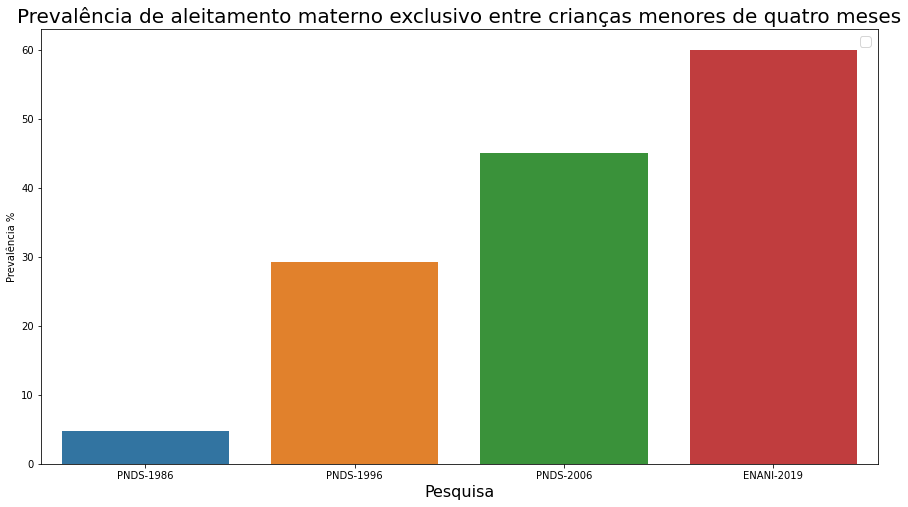

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.barplot(x="Pesquisa" , y='Prevalência' , data=aleit_materno_excl_menores_4meses, ci=float)

fig.set_title('Prevalência de aleitamento materno exclusivo entre crianças menores de quatro meses', fontsize=20)    
fig.legend(title='',fontsize=14)
plt.xlabel('Pesquisa',fontsize=16)
plt.ylabel('Prevalência %')

plt.show()

# Exportando imagem do gráfico
# plt.savefig('casos_hepat_c_brasil_2018_2020.tiff', bbox_inches='tight', dpi=600)

####Prevalência de aleitamento materno exclusivo entre crianças menores de seis meses

No handles with labels found to put in legend.


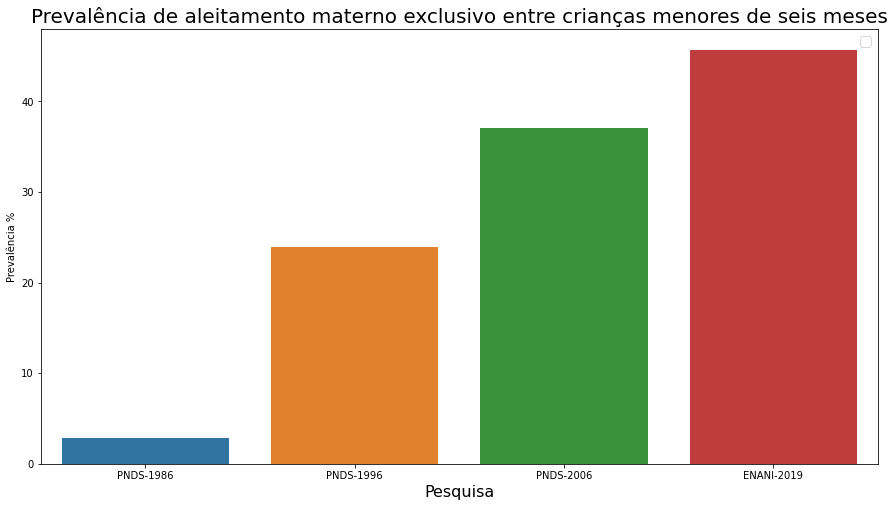

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.barplot(x="Pesquisa" , y='Prevalência' , data=aleit_materno_excl_menores_6meses, ci=None)

fig.set_title('Prevalência de aleitamento materno exclusivo entre crianças menores de seis meses', fontsize=20)    
fig.legend(title='',fontsize=14)
plt.xlabel('Pesquisa',fontsize=16)
plt.ylabel('Prevalência %')

plt.show()

# Exportando imagem do gráfico
# plt.savefig('casos_hepat_c_brasil_2018_2020.tiff', bbox_inches='tight', dpi=600)

####Prevalência de aleitamento continuado aos 12 meses

No handles with labels found to put in legend.


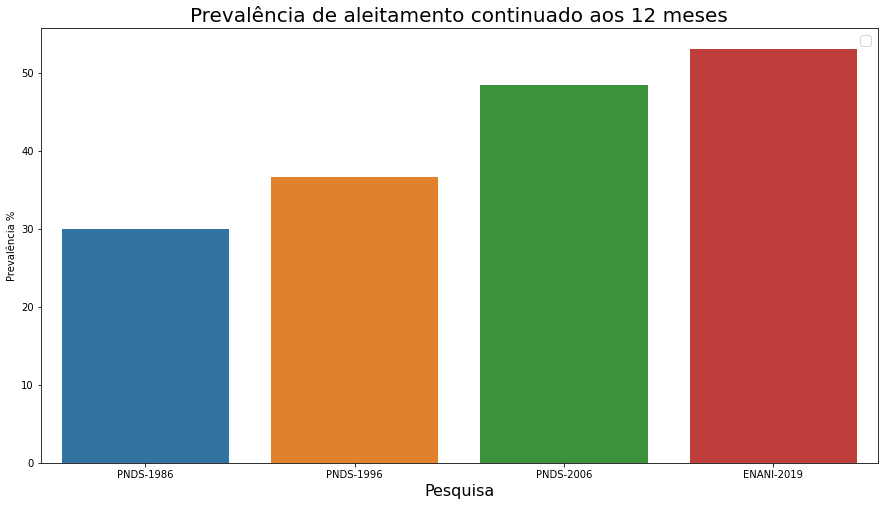

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.barplot(x="Pesquisa" , y='Prevalência' , data=aleit_materno_continuado_12meses, ci=None)

fig.set_title('Prevalência de aleitamento continuado aos 12 meses', fontsize=20)    
fig.legend(title='',fontsize=14)
plt.xlabel('Pesquisa',fontsize=16)
plt.ylabel('Prevalência %')

plt.show()

# Exportando imagem do gráfico
# plt.savefig('casos_hepat_c_brasil_2018_2020.tiff', bbox_inches='tight', dpi=600)

####Prevalência de aleitamento materno total entre crianças menores de 24 meses

No handles with labels found to put in legend.


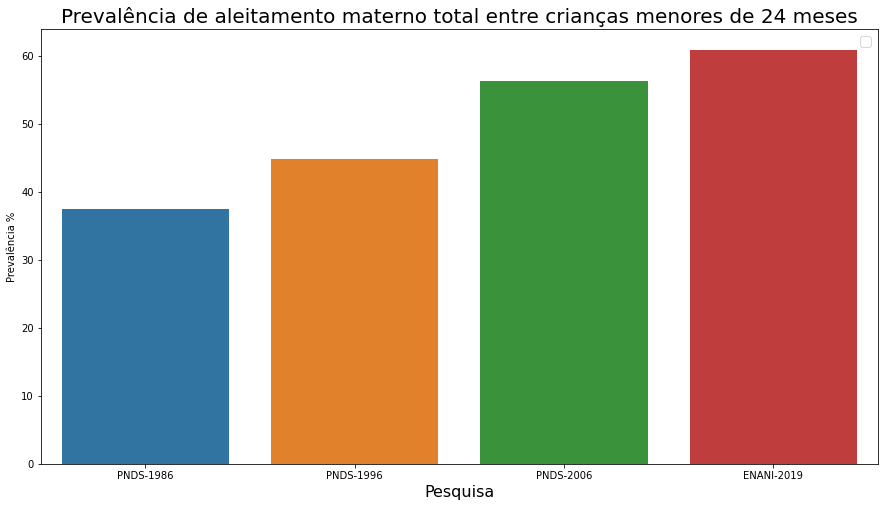

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.barplot(x="Pesquisa" , y='Prevalência' , data=aleit_materno_total_menores_24meses, ci=None)

fig.set_title('Prevalência de aleitamento materno total entre crianças menores de 24 meses', fontsize=20)    
fig.legend(title='',fontsize=14)
plt.xlabel('Pesquisa',fontsize=16)
plt.ylabel('Prevalência %')

plt.show()

# Exportando imagem do gráfico
# plt.savefig('casos_hepat_c_brasil_2018_2020.tiff', bbox_inches='tight', dpi=600)

####Prevalência de aleitamento materno Idades juntas

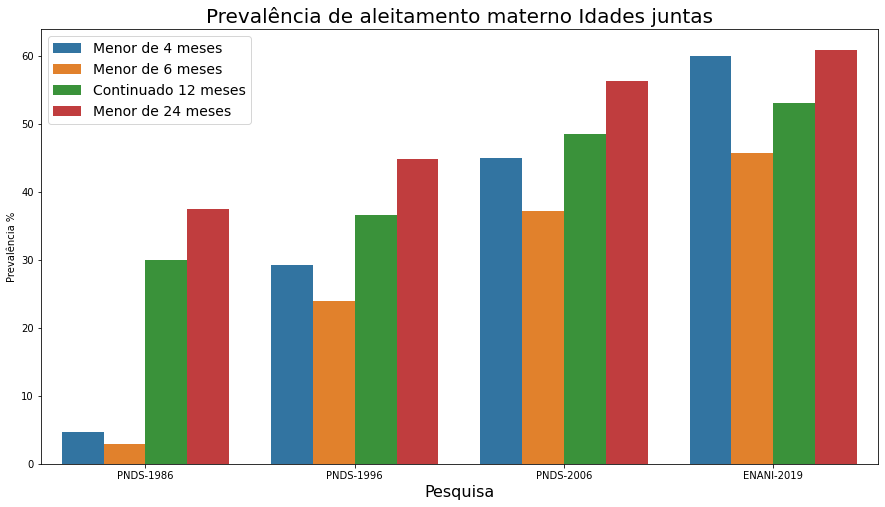

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.barplot(x="Pesquisa" , y='Prevalência' , hue='Idade', data=aleit_materno_idades_juntas, ci=None)

fig.set_title('Prevalência de aleitamento materno Idades juntas', fontsize=20)    
fig.legend(title='',fontsize=14)
plt.xlabel('Pesquisa',fontsize=16)
plt.ylabel('Prevalência %')

plt.show()

# Exportando imagem do gráfico
# plt.savefig('casos_hepat_c_brasil_2018_2020.tiff', bbox_inches='tight', dpi=600)

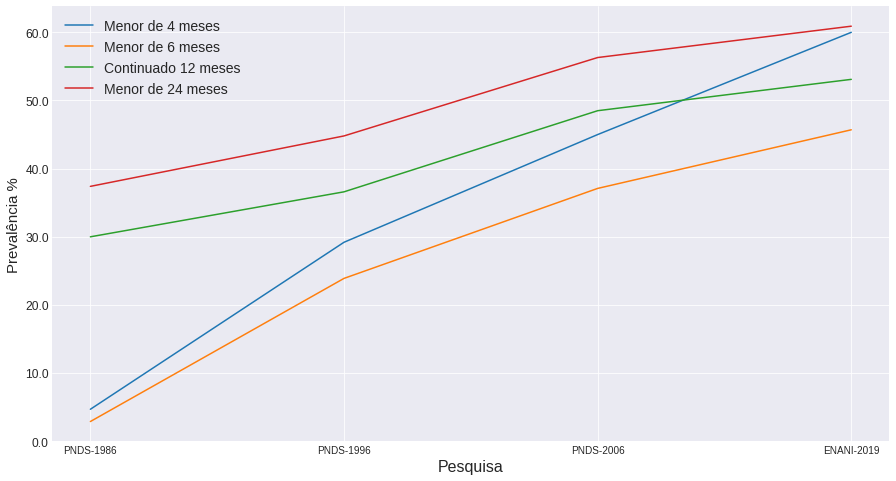

In [ ]:
plt.figure(figsize=(15,8))
plt.style.use('seaborn-darkgrid')

fig = sns.lineplot(x="Pesquisa" , y='Prevalência' , hue='Idade', data=aleit_materno_idades_juntas, ci=None)

# fig.set_title('Prevalência de aleitamento materno Idades juntas', fontsize=20)    
fig.legend(title='',fontsize=14)
plt.xlabel('Pesquisa',fontsize=16)
plt.ylabel('Prevalência %', fontsize=15)
fig.set_yticklabels(fig.get_yticks(), size = 12)

# plt.show()

# Exportando imagem do gráfico
plt.savefig('prevalencia_aleitamento_materno_juntos.png', bbox_inches='tight', dpi=1200)

### Gráficos - Dados Preliminares ENANI-2019 - Análise por macrorregiões

####Prevalência de aleitamento materno exclusivo entre crianças menores de quatro meses no Brasil e macrorregiões

No handles with labels found to put in legend.


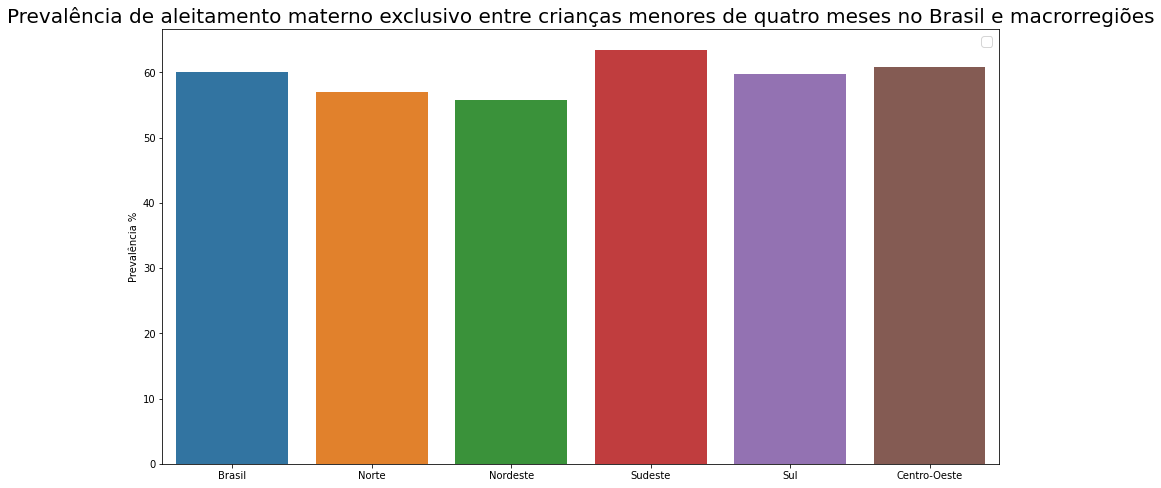

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.barplot(x="Região" , y='Prevalência' , data=aleit_materno_excl_menores_4meses_macro, ci=float)

fig.set_title('Prevalência de aleitamento materno exclusivo entre crianças menores de quatro meses no Brasil e macrorregiões', fontsize=20)    
fig.legend(title='',fontsize=14)
plt.xlabel('',fontsize=16)
plt.ylabel('Prevalência %')

plt.show()

# Exportando imagem do gráfico
# plt.savefig('casos_hepat_c_brasil_2018_2020.tiff', bbox_inches='tight', dpi=600)

####Prevalência de aleitamento materno exclusivo entre crianças menores de seis meses no Brasil e macrorregiões

No handles with labels found to put in legend.


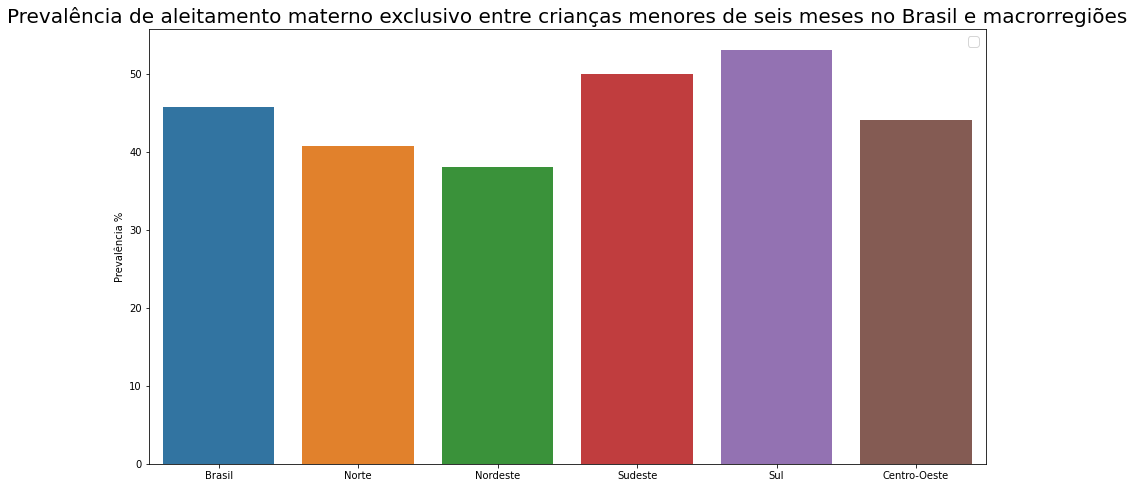

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.barplot(x="Região" , y='Prevalência' , data=aleit_materno_excl_menores_6meses_macro, ci=None)

fig.set_title('Prevalência de aleitamento materno exclusivo entre crianças menores de seis meses no Brasil e macrorregiões', fontsize=20)    
fig.legend(title='',fontsize=14)
plt.xlabel('',fontsize=16)
plt.ylabel('Prevalência %')

plt.show()

# Exportando imagem do gráfico
# plt.savefig('casos_hepat_c_brasil_2018_2020.tiff', bbox_inches='tight', dpi=600)

####Prevalência de aleitamento continuado aos 12 meses no Brasil e macrorregiões

No handles with labels found to put in legend.


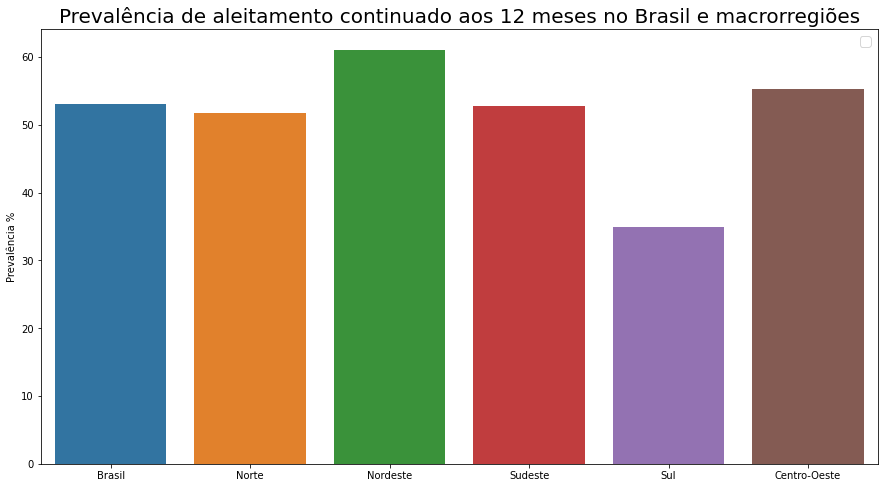

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.barplot(x="Região" , y='Prevalência' , data=aleit_materno_continuado_12meses_macro, ci=None)

fig.set_title('Prevalência de aleitamento continuado aos 12 meses no Brasil e macrorregiões', fontsize=20)    
fig.legend(title='',fontsize=14)
plt.xlabel('',fontsize=16)
plt.ylabel('Prevalência %')

plt.show()

# Exportando imagem do gráfico
# plt.savefig('casos_hepat_c_brasil_2018_2020.tiff', bbox_inches='tight', dpi=600)

####Prevalência de aleitamento materno total entre crianças menores de 24 meses no Brasil e macrorregiões

No handles with labels found to put in legend.


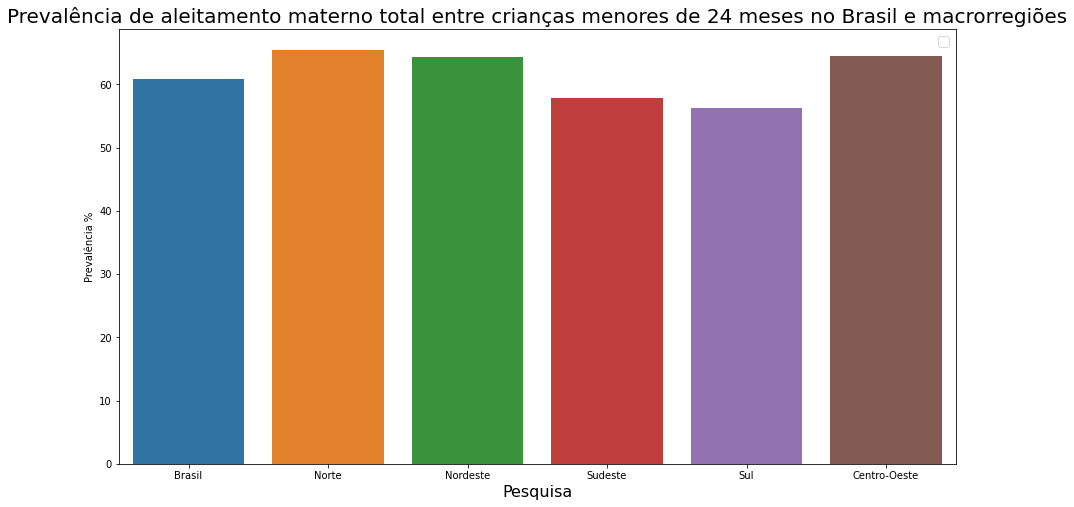

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.barplot(x="Região" , y='Prevalência' , data=aleit_materno_total_menores_24meses_macro, ci=None)

fig.set_title('Prevalência de aleitamento materno total entre crianças menores de 24 meses no Brasil e macrorregiões', fontsize=20)    
fig.legend(title='',fontsize=14)
plt.xlabel('Pesquisa',fontsize=16)
plt.ylabel('Prevalência %')

plt.show()

# Exportando imagem do gráfico
# plt.savefig('casos_hepat_c_brasil_2018_2020.tiff', bbox_inches='tight', dpi=600)

#### Prevalência de aleitamento materno todas idades - Brasil e macrorregiões

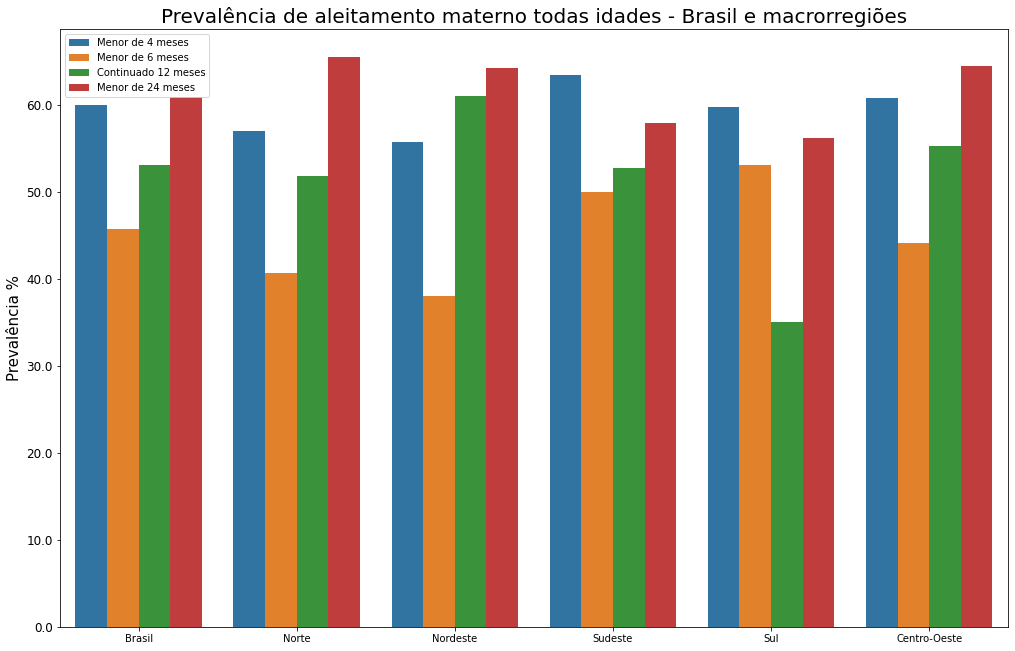

In [ ]:
plt.figure(figsize=(17,11))
fig = sns.barplot(x="Região" , y='Prevalência' , hue='Idade', data=aleit_materno_idades_juntas_macro, ci=None)

fig.set_title('Prevalência de aleitamento materno todas idades - Brasil e macrorregiões', fontsize=20)    
fig.legend(title='',fontsize=10)
plt.xlabel('',fontsize=16)
plt.ylabel('Prevalência %', fontsize=15)
fig.set_yticklabels(fig.get_yticks(), size = 12)

plt.show()

# Exportando imagem do gráfico
# plt.savefig('prevalencia_macrorregioes.png', bbox_inches='tight', dpi=1200)


#### Prevalência de aleitamento materno todas idades - Brasil e macrorregiões - Lineplot

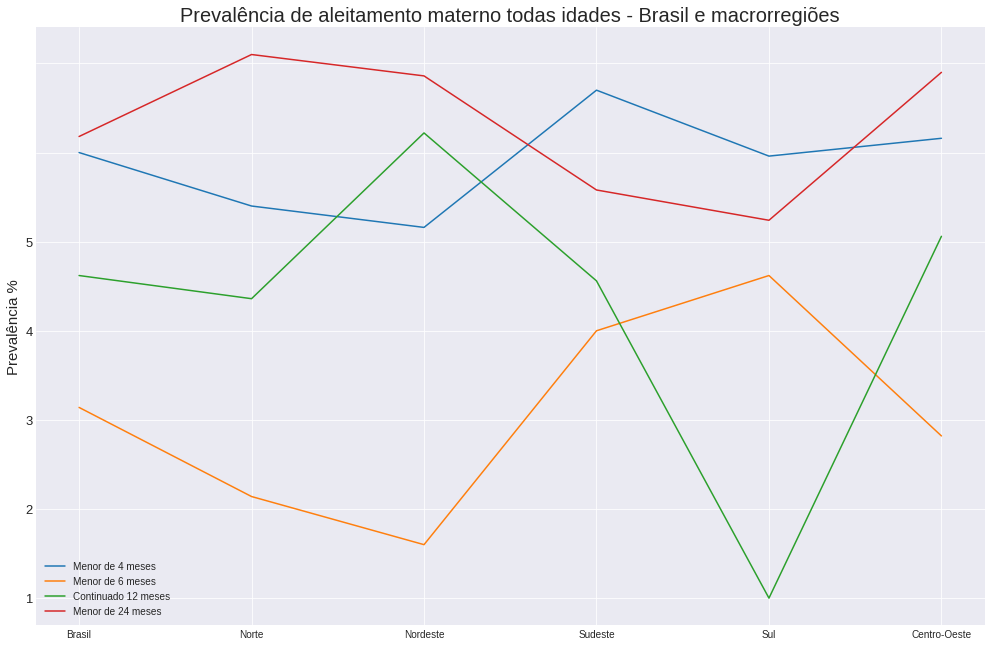

In [ ]:
plt.figure(figsize=(17,11))
plt.style.use('seaborn-darkgrid')

fig = sns.lineplot(x="Região" , y='Prevalência' , hue='Idade', data=aleit_materno_idades_juntas_macro, ci=None)


fig.set_title('Prevalência de aleitamento materno todas idades - Brasil e macrorregiões', fontsize=20)    
fig.legend(title='',fontsize=10)
plt.xlabel('',fontsize=16)
plt.ylabel('Prevalência %', fontsize=15)
fig.set_yticklabels(fig.get_xticks(), size = 13)

# plt.show()

# Exportando imagem do gráfico
plt.savefig('prevalencia_faixa_etaria_macrorregioes.png', bbox_inches='tight', dpi=600)

#### Prevalência de aleitamento materno todas idades - Brasil e macrorregiões - Teste Grafico

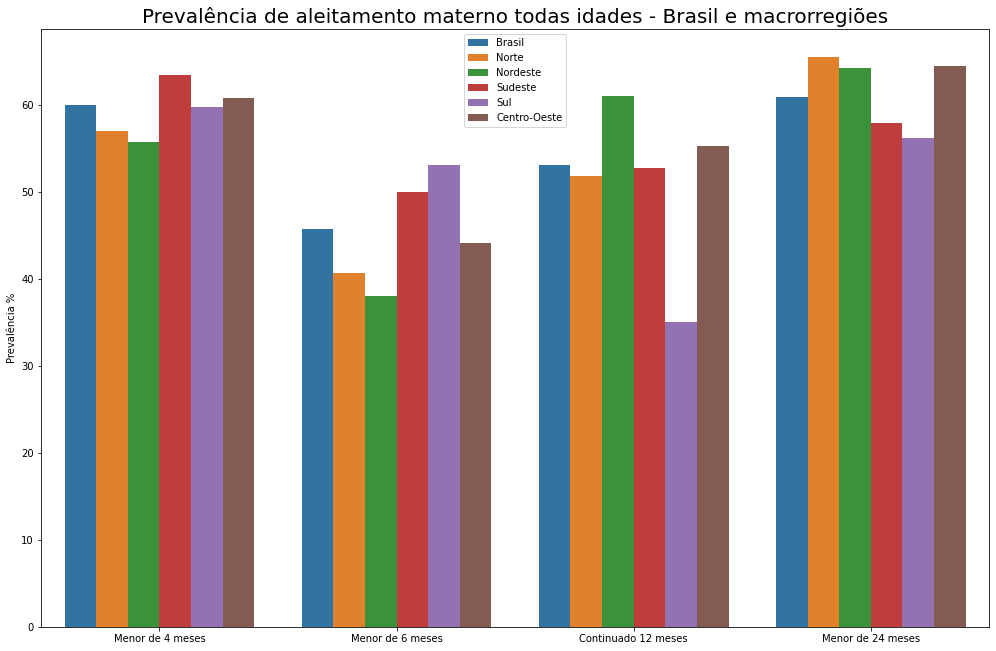

In [ ]:
plt.figure(figsize=(17,11))
fig = sns.barplot(x="Idade" , y='Prevalência' , hue='Região', data=aleit_materno_idades_juntas_macro, ci=None)

fig.set_title('Prevalência de aleitamento materno todas idades - Brasil e macrorregiões', fontsize=20)    
fig.legend(title='',fontsize=10)
plt.xlabel('',fontsize=16)
plt.ylabel('Prevalência %')

plt.show()

# Exportando imagem do gráfico
# plt.savefig('casos_hepat_c_brasil_2018_2020.tiff', bbox_inches='tight', dpi=600)

#### Prevalência de aleitamento materno todas idades - Brasil e macrorregiões - Lineplot Teste Grafico

[Text(0, 0, '30.0'),
 Text(0, 0, '35.0'),
 Text(0, 0, '40.0'),
 Text(0, 0, '45.0'),
 Text(0, 0, '50.0'),
 Text(0, 0, '55.0'),
 Text(0, 0, '60.0'),
 Text(0, 0, '65.0'),
 Text(0, 0, '70.0')]

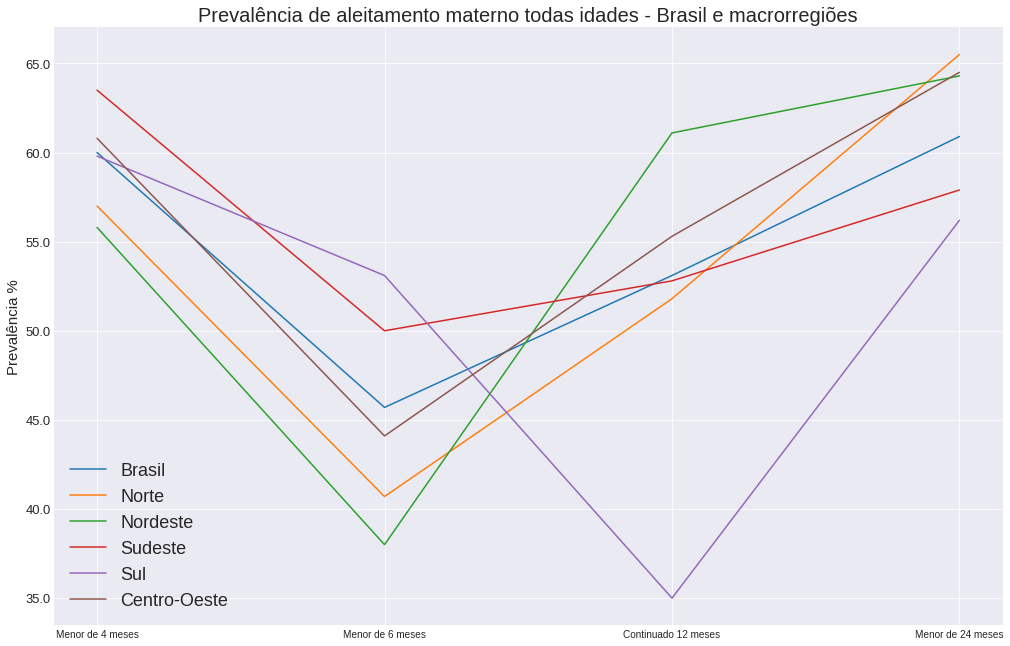

In [ ]:
plt.figure(figsize=(17,11))
plt.style.use('seaborn-darkgrid')

fig = sns.lineplot(x="Idade" , y='Prevalência' , hue='Região', data=aleit_materno_idades_juntas_macro, ci=None)

fig.set_title('Prevalência de aleitamento materno todas idades - Brasil e macrorregiões', fontsize=20)    
fig.legend(title='',fontsize=18)
plt.xlabel('',fontsize=16)
plt.ylabel('Prevalência %', fontsize=15)
fig.set_yticklabels(fig.get_yticks(), size = 13)

# plt.show()

# Exportando imagem do gráfico
# plt.savefig('Prevalencia_aleitamento_materno_todas_idades_macroregioes.png', bbox_inches='tight', dpi=1200)

### Gráficos BLH

####Doadoras

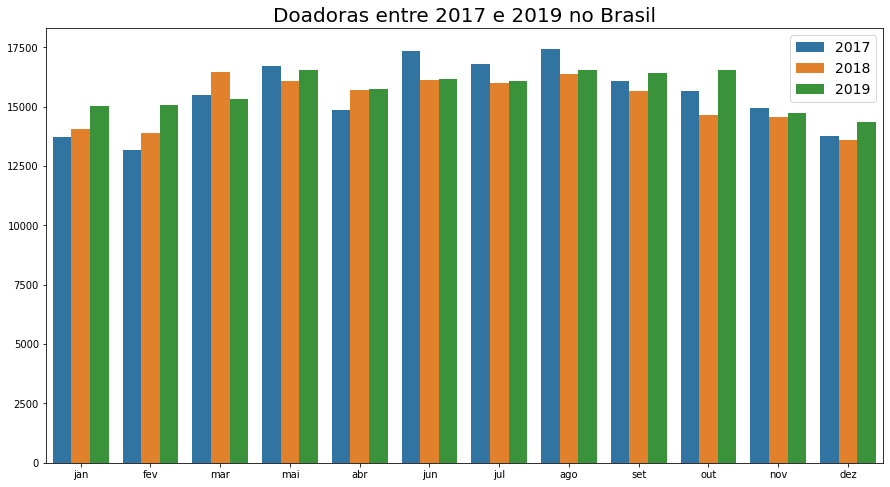

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.barplot(x="Mes/Ano", y="Doadoras", hue="Ano", data=dados_blh, ci=float)

fig.set_title('Doadoras entre 2017 e 2019 no Brasil', fontsize=20)    
fig.legend(title='',fontsize=14)
plt.xlabel('',fontsize=16)
plt.ylabel('')

plt.show()

# Exportando imagem do gráfico
# plt.savefig('casos_hepat_c_brasil_2018_2020.tiff', bbox_inches='tight', dpi=600)

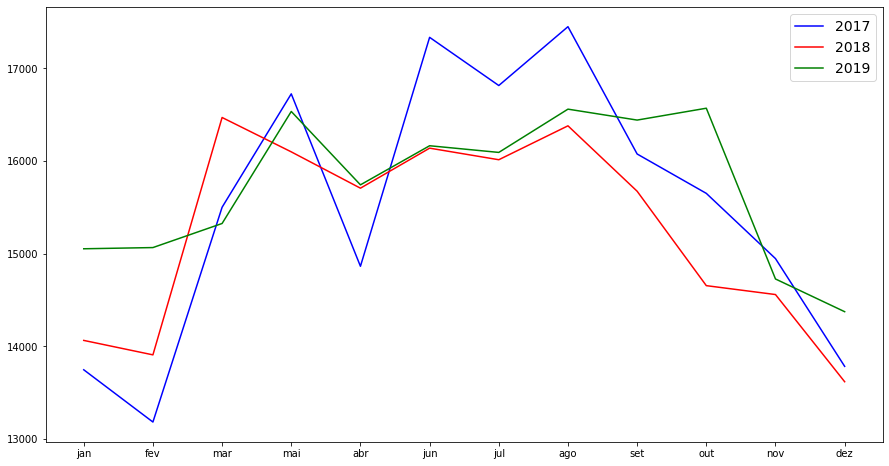

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.lineplot(x="Mes/Ano", y="Doadoras", hue="Ano", data=dados_blh, ci=float, palette=["blue","red","green"])

# fig.set_title('Doadoras entre 2017 e 2019 no Brasil', fontsize=20)    
fig.legend(title='',fontsize=14)
plt.xlabel('',fontsize=16)
plt.ylabel('')

# plt.show()

# Exportando imagem do gráfico
plt.savefig('doadoras_entre_2017_e_2019_no_Brasil.png', bbox_inches='tight', dpi=1200)

#### Receptores

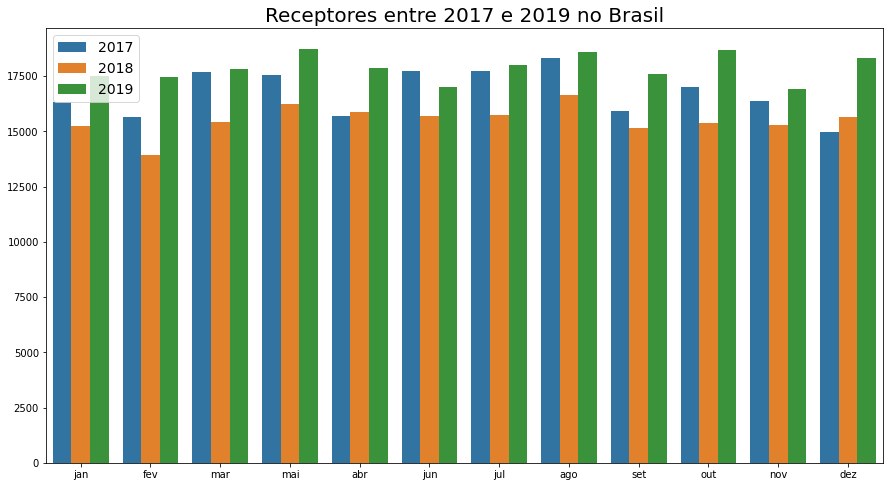

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.barplot(x="Mes/Ano", y="Receptores", hue="Ano", data=dados_blh, ci=float)

fig.set_title('Receptores entre 2017 e 2019 no Brasil', fontsize=20)    
fig.legend(title='',fontsize=14)
plt.xlabel('',fontsize=16)
plt.ylabel('')

plt.show()

# Exportando imagem do gráfico
# plt.savefig('casos_hepat_c_brasil_2018_2020.tiff', bbox_inches='tight', dpi=600)

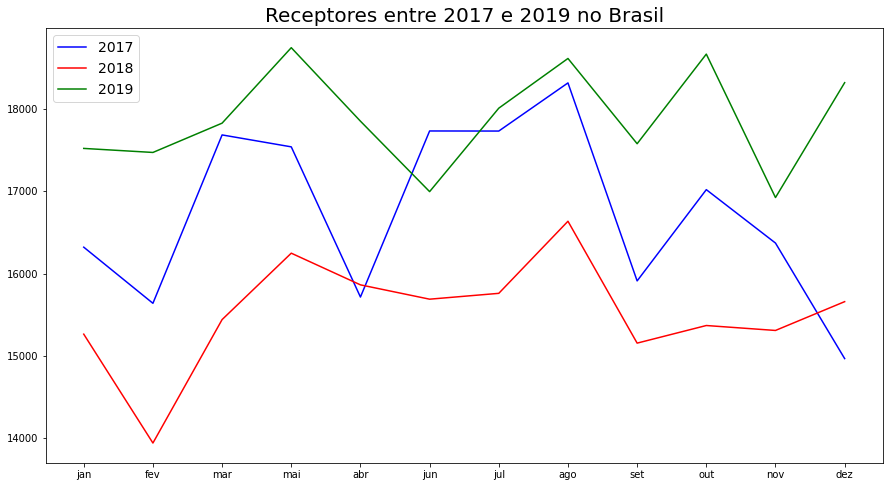

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.lineplot(x="Mes/Ano", y="Receptores", hue="Ano", data=dados_blh, ci=float, palette=["blue","red","green"])

fig.set_title('Receptores entre 2017 e 2019 no Brasil', fontsize=20)    
fig.legend(title='',fontsize=14)
plt.xlabel('',fontsize=16)
plt.ylabel('')

plt.show()

# Exportando imagem do gráfico
# plt.savefig('casos_hepat_c_brasil_2018_2020.tiff', bbox_inches='tight', dpi=600)
plt.savefig('receptores_entre_2017_e_2019_no_Brasil.png', bbox_inches='tight', dpi=1200)

#### Leite Humano Coletado

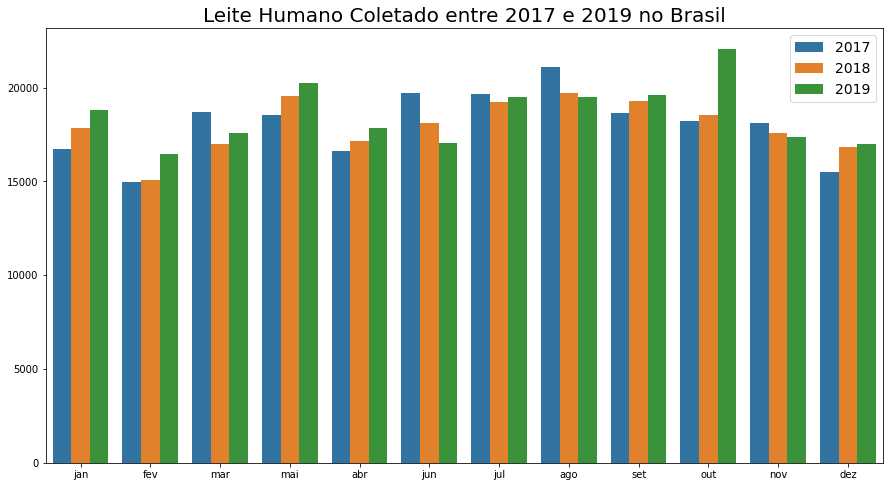

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.barplot(x="Mes/Ano", y="Leite Humano Coletado", hue="Ano", data=dados_blh, ci=float)

fig.set_title('Leite Humano Coletado entre 2017 e 2019 no Brasil', fontsize=20)    
fig.legend(title='',fontsize=14)
plt.xlabel('',fontsize=16)
plt.ylabel('')

plt.show()

# Exportando imagem do gráfico
# plt.savefig('casos_hepat_c_brasil_2018_2020.tiff', bbox_inches='tight', dpi=600)

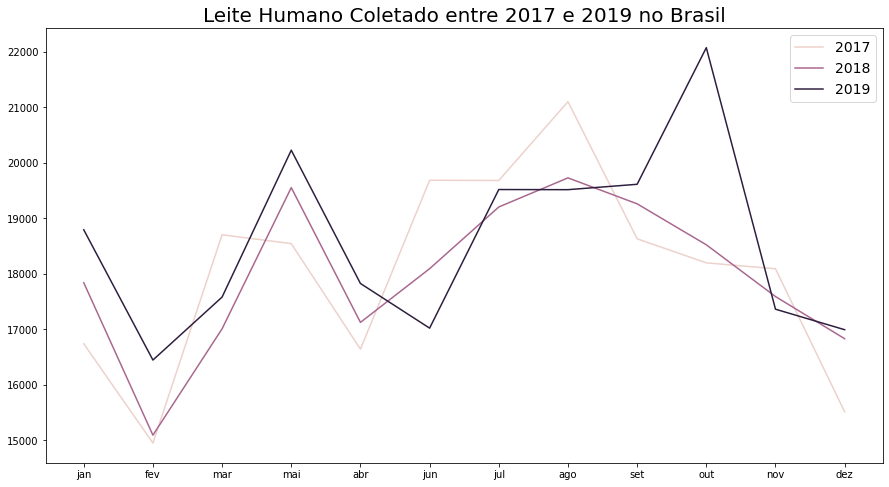

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.lineplot(x="Mes/Ano", y="Leite Humano Coletado", hue="Ano", data=dados_blh, ci=float)

fig.set_title('Leite Humano Coletado entre 2017 e 2019 no Brasil', fontsize=20)    
fig.legend(title='',fontsize=14)
plt.xlabel('',fontsize=16)
plt.ylabel('')

plt.show()

# Exportando imagem do gráfico
# plt.savefig('casos_hepat_c_brasil_2018_2020.tiff', bbox_inches='tight', dpi=600)

#### Leite Humano recebido

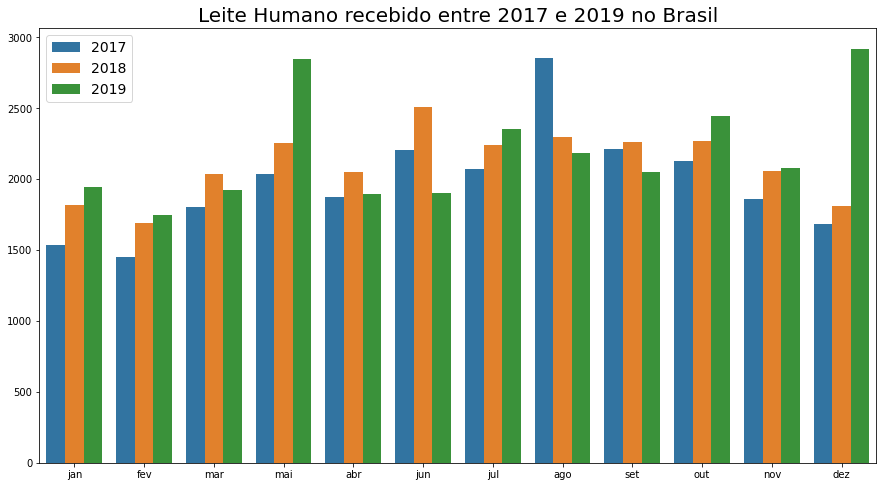

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.barplot(x="Mes/Ano", y="Leite Humano recebido", hue="Ano", data=dados_blh, ci=float)

fig.set_title('Leite Humano recebido entre 2017 e 2019 no Brasil', fontsize=20)    
fig.legend(title='',fontsize=14)
plt.xlabel('',fontsize=16)
plt.ylabel('')

plt.show()

# Exportando imagem do gráfico
# plt.savefig('casos_hepat_c_brasil_2018_2020.tiff', bbox_inches='tight', dpi=600)

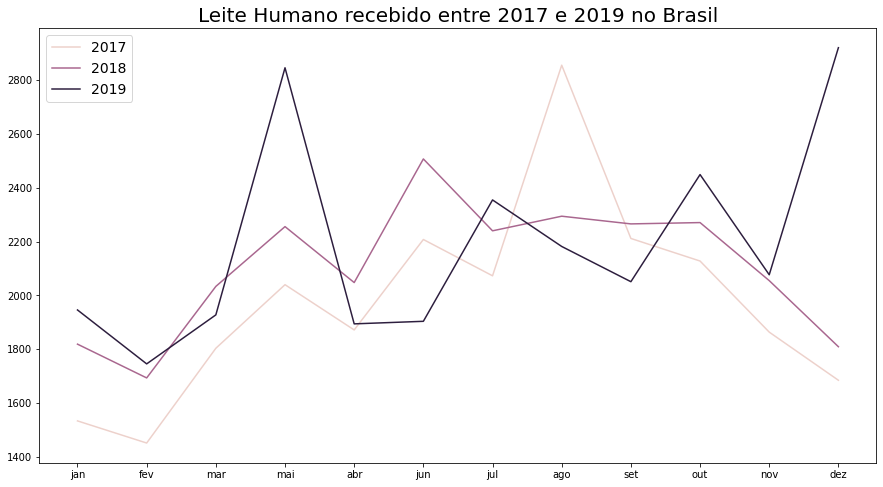

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.lineplot(x="Mes/Ano", y="Leite Humano recebido", hue="Ano", data=dados_blh, ci=float)

fig.set_title('Leite Humano recebido entre 2017 e 2019 no Brasil', fontsize=20)    
fig.legend(title='',fontsize=14)
plt.xlabel('',fontsize=16)
plt.ylabel('')

plt.show()

# Exportando imagem do gráfico
# plt.savefig('casos_hepat_c_brasil_2018_2020.tiff', bbox_inches='tight', dpi=600)

#### Total Doadoras

No handles with labels found to put in legend.


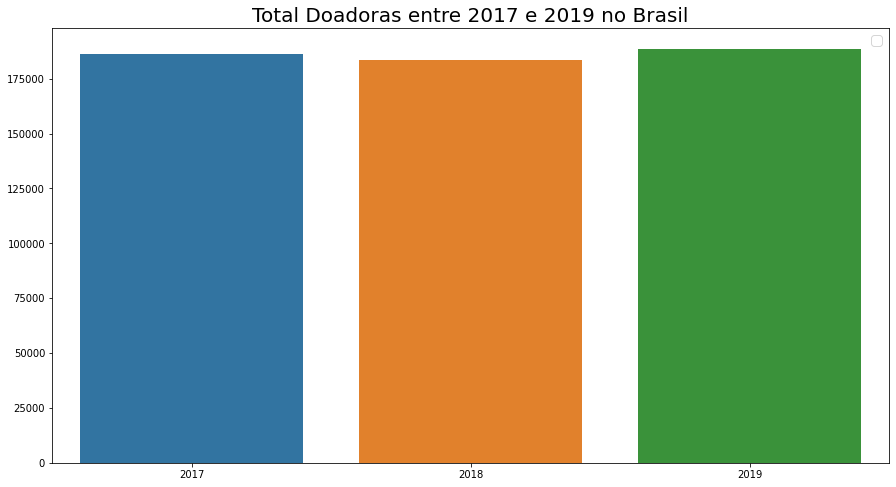

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.barplot(x="Ano", y="Doadoras", data=dados_ano, ci=float)

fig.set_title('Total Doadoras entre 2017 e 2019 no Brasil', fontsize=20)    
fig.legend(title='',fontsize=14)
plt.xlabel('',fontsize=16)
plt.ylabel('')

plt.show()

# Exportando imagem do gráfico
# plt.savefig('casos_hepat_c_brasil_2018_2020.tiff', bbox_inches='tight', dpi=600)

#### Total Receptores

No handles with labels found to put in legend.


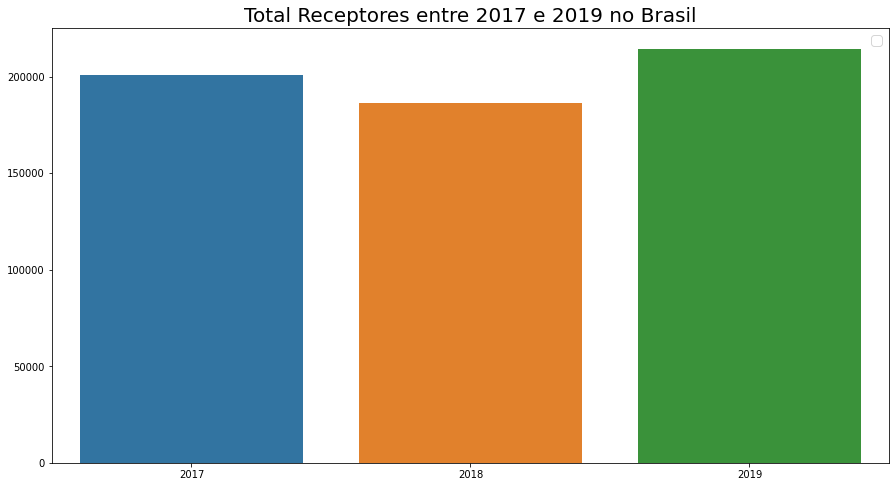

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.barplot(x="Ano", y="Receptores", data=dados_ano, ci=float)

fig.set_title('Total Receptores entre 2017 e 2019 no Brasil', fontsize=20)    
fig.legend(title='',fontsize=14)
plt.xlabel('',fontsize=16)
plt.ylabel('')

plt.show()

# Exportando imagem do gráfico
# plt.savefig('casos_hepat_c_brasil_2018_2020.tiff', bbox_inches='tight', dpi=600)

#### Total Leite Humano Coletado

No handles with labels found to put in legend.


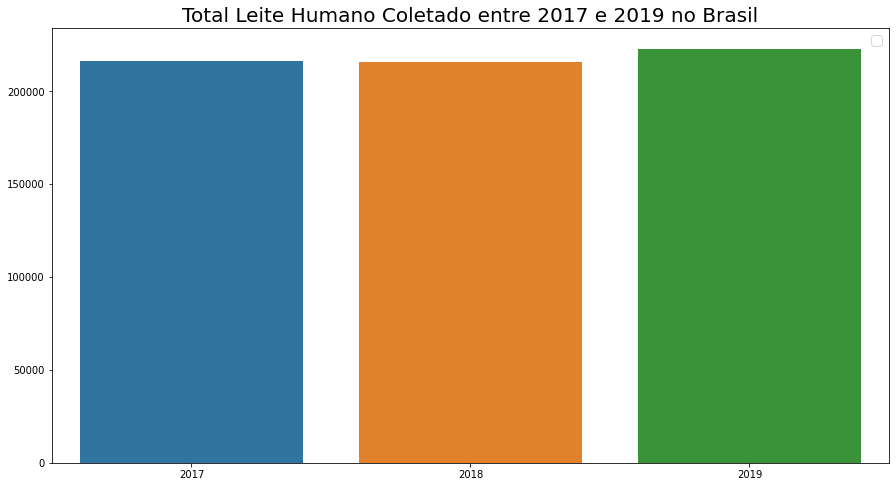

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.barplot(x="Ano", y="Leite Humano Coletado", data=dados_ano, ci=float)

fig.set_title('Total Leite Humano Coletado entre 2017 e 2019 no Brasil', fontsize=20)    
fig.legend(title='',fontsize=14)
plt.xlabel('',fontsize=16)
plt.ylabel('')

plt.show()

# Exportando imagem do gráfico
# plt.savefig('casos_hepat_c_brasil_2018_2020.tiff', bbox_inches='tight', dpi=600)

#### Total Leite Humano recebido

No handles with labels found to put in legend.


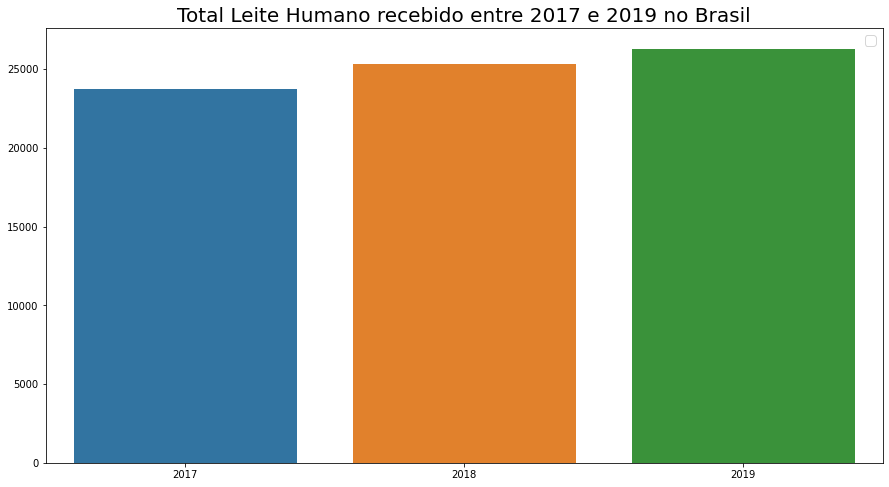

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.barplot(x="Ano", y="Leite Humano recebido", data=dados_ano, ci=float)

fig.set_title('Total Leite Humano recebido entre 2017 e 2019 no Brasil', fontsize=20)    
fig.legend(title='',fontsize=14)
plt.xlabel('',fontsize=16)
plt.ylabel('')

plt.show()

# Exportando imagem do gráfico
# plt.savefig('casos_hepat_c_brasil_2018_2020.tiff', bbox_inches='tight', dpi=600)